In [2]:
pip install geopandas shapely fiona pyproj rtree

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/0b/70/d5cd0696eff08e62fdbdebe5b46527facb4e7220eabe0ac6225efab50168/geopandas-1.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for shapely from https://files.pythonhosted.org/packages/93/5b/842022c00fbb051083c1c85430f3bb55565b7fd2d775f4f398c0ba8052ce/shapely-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for fiona from https://files.pythonhosted.org/packages/95/32/c1d53b4d77926414ffdf5bd38344e900e378ae9ccb2a65754cdb6d5344c2/fiona-1.10.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ------- -------------------------------- 10.2/58.1 kB ? eta -:--:--
     -------------------- ----------------- 30.7/58.1 kB 325.1 kB/s eta 0:00:01
     ----------

In [2]:
import geopandas as gpd

# Check version
print(gpd.__version__)


1.1.1


In [3]:
import geopandas as gpd

file_path = r"C:\Users\91798\Downloads\Kerala Tourism\gadm41_IND_1.kml"

india = gpd.read_file(file_path, driver="KML")

print(india.head())
print(india.columns)



      Name Description                                           geometry
0  IND.1_1         IND  MULTIPOLYGON Z (((93.7908 6.8514 0, 93.7872 6....
1  IND.2_1         IND  MULTIPOLYGON Z (((78.7395 13.0455 0, 78.7255 1...
2  IND.3_1         IND  MULTIPOLYGON Z (((95.3683 27.1074 0, 95.3737 2...
3  Z07.3_1         Z07  MULTIPOLYGON Z (((94.1912 27.4963 0, 94.1869 2...
4  IND.4_1         IND  MULTIPOLYGON Z (((92.7545 24.5011 0, 92.7436 2...
Index(['Name', 'Description', 'geometry'], dtype='object')


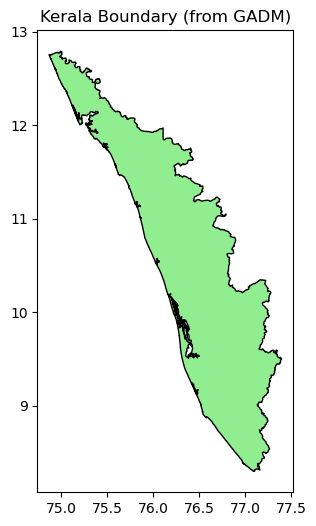

In [4]:
# Filter Kerala by its code
kerala = india[india["Name"] == "IND.17_1"]

# Plot Kerala
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
kerala.plot(ax=ax, color="lightgreen", edgecolor="black")
plt.title("Kerala Boundary (from GADM)")
plt.show()


In [5]:
file_path = r"C:\Users\91798\Downloads\Kerala Tourism\gadm41_IND_2.kml"

india = gpd.read_file(file_path, driver="KML")

print(india.head())
print(india.columns)

        Name Description                                           geometry
0  IND.1.1_1         IND  MULTIPOLYGON Z (((93.7899 6.852 0, 93.7909 6.8...
1  IND.1.2_1         IND  MULTIPOLYGON Z (((92.8444 12.1497 0, 92.8461 1...
2  IND.1.3_1         IND  MULTIPOLYGON Z (((92.5211 10.8969 0, 92.53 10....
3  IND.2.1_1         IND  MULTIPOLYGON Z (((77.846 13.9283 0, 77.8301 13...
4  IND.2.2_1         IND  MULTIPOLYGON Z (((78.5455 12.7439 0, 78.5503 1...
Index(['Name', 'Description', 'geometry'], dtype='object')


In [6]:
import geopandas as gpd

# Load your districts KML file
districts = gpd.read_file(r"C:\Users\91798\Downloads\Kerala Tourism\gadm41_IND_2.kml", driver="KML")

# Filter Kerala districts by Name column (IND.17.1_1 … IND.17.14_1)
kerala_districts = districts[districts["Name"].isin([
    "IND.17.1_1", "IND.17.2_1", "IND.17.3_1", "IND.17.4_1",
    "IND.17.5_1", "IND.17.6_1", "IND.17.7_1", "IND.17.8_1",
    "IND.17.9_1", "IND.17.10_1", "IND.17.11_1", "IND.17.12_1",
    "IND.17.13_1", "IND.17.14_1"
])]

# Check what you got
print(kerala_districts[["Name"]])

# Save filtered Kerala districts for later use
kerala_districts.to_file(r"C:\Users\91798\Downloads\Kerala Tourism\kerala_districts.geojson", driver="GeoJSON")


            Name
281   IND.17.1_1
282   IND.17.2_1
283   IND.17.3_1
284   IND.17.4_1
285   IND.17.5_1
286   IND.17.6_1
287   IND.17.7_1
288   IND.17.8_1
289   IND.17.9_1
290  IND.17.10_1
291  IND.17.11_1
292  IND.17.12_1
293  IND.17.13_1
294  IND.17.14_1


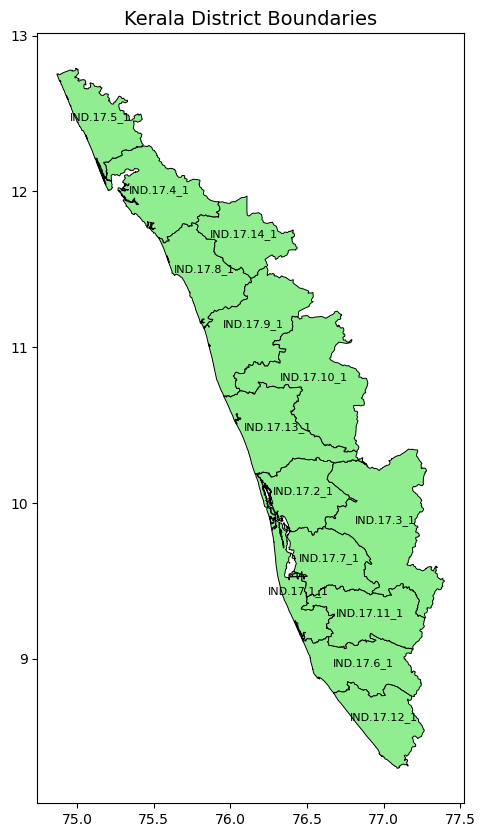

In [7]:

# Load the district-level KML file
districts = gpd.read_file(r"C:\Users\91798\Downloads\Kerala Tourism\gadm41_IND_2.kml", driver="KML")

# Filter only Kerala’s 14 districts
kerala_districts = districts[districts["Name"].isin([
    "IND.17.1_1", "IND.17.2_1", "IND.17.3_1", "IND.17.4_1",
    "IND.17.5_1", "IND.17.6_1", "IND.17.7_1", "IND.17.8_1",
    "IND.17.9_1", "IND.17.10_1", "IND.17.11_1", "IND.17.12_1",
    "IND.17.13_1", "IND.17.14_1"
])]

# Plot Kerala districts
fig, ax = plt.subplots(figsize=(8, 10))
kerala_districts.plot(ax=ax, edgecolor="black", facecolor="lightgreen", linewidth=0.7)

# Add labels (using Name column)
for idx, row in kerala_districts.iterrows():
    plt.annotate(
        text=row["Name"], 
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha="center", fontsize=8, color="black"
    )

ax.set_title("Kerala District Boundaries", fontsize=14)
plt.show()


C:\Users\91798\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


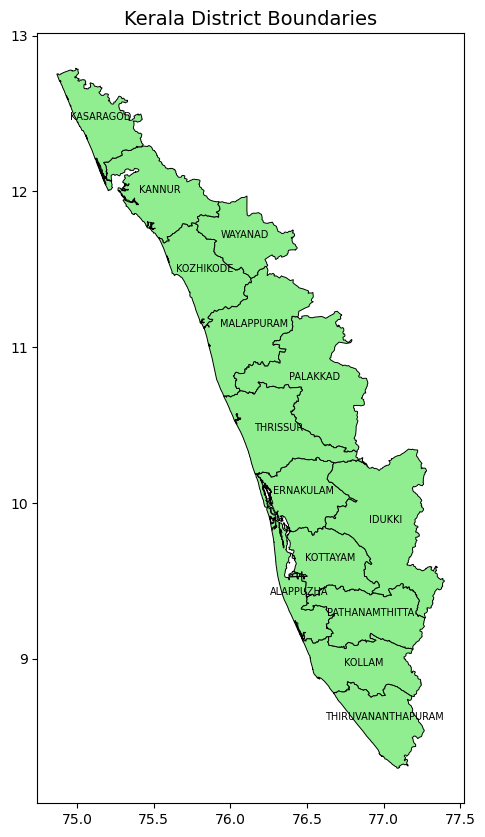

In [48]:


# Load the district-level KML file
districts = gpd.read_file(r"C:\Users\91798\Downloads\Kerala Tourism\gadm41_IND_2.kml", driver="KML")

# Keep only Kerala’s 14 districts
kerala_districts = districts[districts["Name"].isin([
    "IND.17.1_1", "IND.17.2_1", "IND.17.3_1", "IND.17.4_1",
    "IND.17.5_1", "IND.17.6_1", "IND.17.7_1", "IND.17.8_1",
    "IND.17.9_1", "IND.17.10_1", "IND.17.11_1", "IND.17.12_1",
    "IND.17.13_1", "IND.17.14_1"
])]

# Mapping: GADM code → District name
name_mapping = {
    "IND.17.12_1": "THIRUVANANTHAPURAM",
    "IND.17.6_1": "KOLLAM",
    "IND.17.11_1": "PATHANAMTHITTA",
    "IND.17.1_1": "ALAPPUZHA",
    "IND.17.7_1": "KOTTAYAM",
    "IND.17.3_1": "IDUKKI",
    "IND.17.2_1": "ERNAKULAM",
    "IND.17.13_1": "THRISSUR",
    "IND.17.10_1": "PALAKKAD",
    "IND.17.9_1": "MALAPPURAM",
    "IND.17.8_1": "KOZHIKODE",
    "IND.17.14_1": "WAYANAD",
    "IND.17.4_1": "KANNUR",
    "IND.17.5_1": "KASARAGOD"
}


# Add a new column with district names
kerala_districts["District"] = kerala_districts["Name"].map(name_mapping)

# Plot Kerala districts
fig, ax = plt.subplots(figsize=(8, 10))
kerala_districts.plot(ax=ax, edgecolor="black", facecolor="lightgreen", linewidth=0.7)

# Add labels with district names
for idx, row in kerala_districts.iterrows():
    plt.annotate(
        text=row["District"], 
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha="center", fontsize=7, color="black"
    )

ax.set_title("Kerala District Boundaries", fontsize=14)
plt.show()


In [9]:
import pandas as pd

# Load tourist data
tourist_data = pd.read_csv(r"C:\Users\91798\Downloads\Kerala Tourism\Tourist_data_2023.csv")

print(tourist_data.head())


    District  Year      DTV     FTV
0  ALAPPUZHA  2023   744352   31403
1  ERNAKULAM  2023  4487930  279904
2     IDUKKI  2023  3633584  103644
3     KANNUR  2023   854838    2431
4  KASARAGOD  2023   292975    2291


In [10]:
# Add uppercase district names column
kerala_districts["DISTRICT"] = kerala_districts["Name"].map(name_mapping)


C:\Users\91798\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [11]:
# Merge on DISTRICT column
merged = kerala_districts.merge(tourist_data, left_on="DISTRICT", right_on="District")


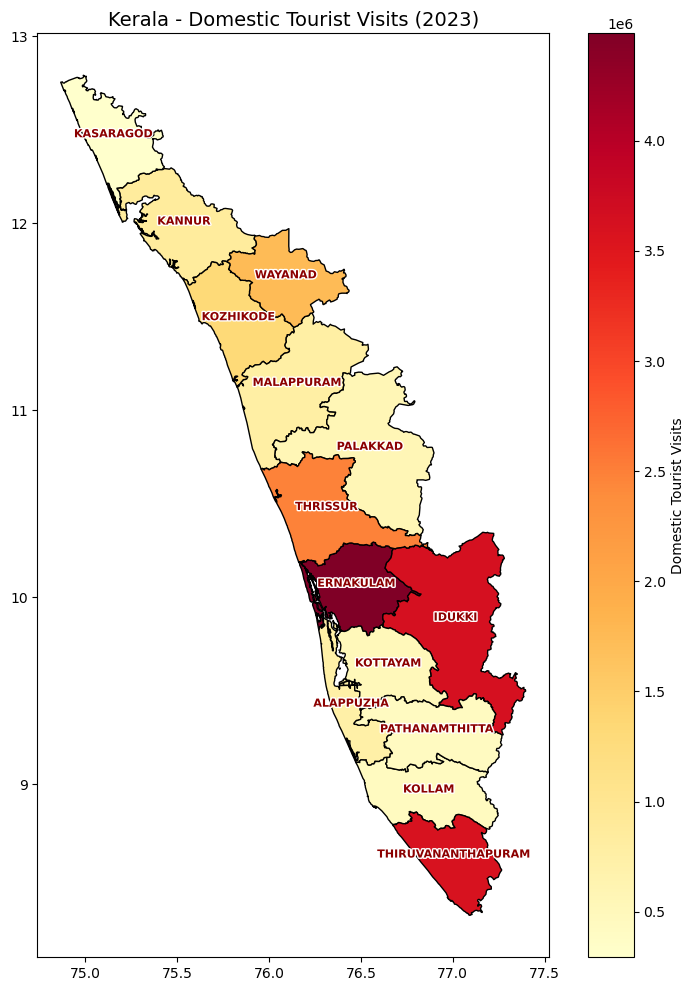

In [12]:
import matplotlib.patheffects as PathEffects
fig, ax = plt.subplots(figsize=(10, 12))
merged.plot(column="DTV", cmap="YlOrRd", legend=True, 
            legend_kwds={'label': "Domestic Tourist Visits"}, ax=ax, edgecolor="black")

# Add district labels
for idx, row in merged.iterrows():
    plt.annotate(
        text=row["DISTRICT"],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha="center",
        fontsize=8,          # increase size
        fontweight="bold",   # make text bold
        color="darkred",     # better contrast
        path_effects=[       # add white outline for clarity
            PathEffects.withStroke(linewidth=2, foreground="white")
        ]
    )

ax.set_title("Kerala - Domestic Tourist Visits (2023)", fontsize=14)
plt.show()


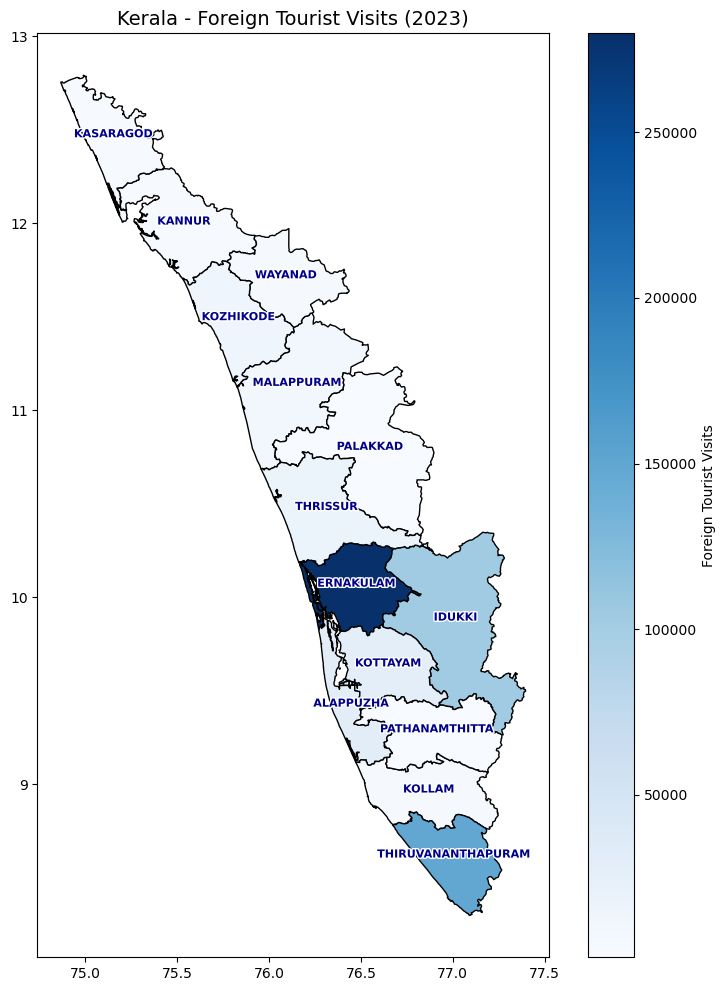

In [13]:
fig, ax = plt.subplots(figsize=(10, 12))
merged.plot(column="FTV", cmap="Blues", legend=True, 
            legend_kwds={'label': "Foreign Tourist Visits"}, ax=ax, edgecolor="black")

# Add district labels
for idx, row in merged.iterrows():
    plt.annotate(
        text=row["DISTRICT"],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha="center",
        fontsize=8,          # increase size
        fontweight="bold",   # make text bold
        color="darkblue",     # better contrast
        path_effects=[       # add white outline for clarity
            PathEffects.withStroke(linewidth=2, foreground="white")
        ]
    )

ax.set_title("Kerala - Foreign Tourist Visits (2023)", fontsize=14)
plt.show()


In [36]:
!pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/31/b3/802576f2ea5dcb48501bb162e4c7b7b3ca5654a42b2c968ef98a797a4c79/geographiclib-2.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 326.8 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 554.9 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 433.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.7 kB ? eta -:--:--
   ------------------------------ --------- 30.7/40.7 kB 660.6

In [14]:
import pandas as pd
from geopy.geocoders import Nominatim
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="kerala_tourism_locator")

# List of tourist destinations
places = [
    "Kochi, Kerala, India",
    "Thiruvananthapuram, Kerala, India",
    "Guruvayoor, Kerala, India",
    "Munnar, Kerala, India",
    "Kozhikode, Kerala, India",
    "Thekkady, Kerala, India",
    "Wayanad, Kerala, India",
    "Kovalam, Kerala, India",
    "Pookkode Lake, Vythiri, Kerala, India",
    "Alappuzha, Kerala, India",
    "Aluva, Kerala, India",
    "Varkala, Kerala, India",
    "Iringal, Kottakkal, Kerala, India",
    "Maradu, Kerala, India",
    "Kumarakom, Kerala, India",
    "Vagamon, Kerala, India",
    "Parassinikadavu, Kerala, India",
    "Meenkunnu Beach, Payyambalam, Kannur, Kerala, India",
    "Malampuzha, Kerala, India",
    "Kollam, Kerala, India"
]

# Empty list to store results
coords = []

# Fetch coordinates
for place in places:
    try:
        location = geolocator.geocode(place)
        if location:
            coords.append([place, location.latitude, location.longitude])
        else:
            coords.append([place, None, None])
    except Exception as e:
        coords.append([place, None, None])
    time.sleep(1)  # Sleep to avoid hitting API rate limits

# Save to dataframe
df = pd.DataFrame(coords, columns=["Place", "Latitude", "Longitude"])
print(df)

# Save to CSV for later use
df.to_csv("DTV_Locations_Coordinates.csv", index=False)


                                                Place   Latitude  Longitude
0                                Kochi, Kerala, India   9.967903  76.244438
1                   Thiruvananthapuram, Kerala, India   8.488227  76.947551
2                           Guruvayoor, Kerala, India  10.592534  76.033927
3                               Munnar, Kerala, India  10.086996  77.060091
4                            Kozhikode, Kerala, India  11.245056  75.775472
5                             Thekkady, Kerala, India   9.580500  77.181142
6                              Wayanad, Kerala, India  11.715129  76.127118
7                              Kovalam, Kerala, India   8.390259  76.978515
8               Pookkode Lake, Vythiri, Kerala, India        NaN        NaN
9                            Alappuzha, Kerala, India   9.500665  76.412414
10                               Aluva, Kerala, India  10.107768  76.356853
11                             Varkala, Kerala, India   8.734229  76.725709
12          

In [38]:
import pandas as pd
from geopy.geocoders import Nominatim
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="kerala_tourism_project")

# Top 20 FTV locations
locations = [
    "Kochi city, Kerala, India",
    "Kovalam, Kerala, India",
    "Thiruvananthapuram City, Kerala, India",
    "Fort Kochi, Kerala, India",
    "Thekkady, Kerala, India",
    "Munnar, Kerala, India",
    "Alappuzha, Kerala, India",
    "Kumarakom, Kerala, India",
    "Maradu, Kerala, India",
    "Varkala, Kerala, India",
    "Kozhikode city, Kerala, India",
    "Aluva, Kerala, India",
    "Guruvayoor, Kerala, India",
    "Irringal-Kottakkal, Kerala, India",
    "Kollam, Kerala, India",
    "Cherai Beach, Kerala, India",
    "Athirapalli, Kerala, India",
    "Wayanad, Kerala, India",
    "Wagamon, Kerala, India",
    "Kalady, Kerala, India"
]

# Fetch coordinates
coords = []
for loc in locations:
    try:
        location = geolocator.geocode(loc, timeout=10)
        if location:
            coords.append([loc, location.latitude, location.longitude])
        else:
            coords.append([loc, None, None])
    except:
        coords.append([loc, None, None])
    time.sleep(1)  # be gentle with API

# Save to CSV
df = pd.DataFrame(coords, columns=["Location", "Latitude", "Longitude"])
df.to_csv("FTV_Locations_Coordinates.csv", index=False)

print(df)


                                  Location   Latitude  Longitude
0                Kochi city, Kerala, India   9.967903  76.244438
1                   Kovalam, Kerala, India   8.390259  76.978515
2   Thiruvananthapuram City, Kerala, India   8.483404  76.947462
3                Fort Kochi, Kerala, India   9.967569  76.242190
4                  Thekkady, Kerala, India   9.580500  77.181142
5                    Munnar, Kerala, India  10.086996  77.060091
6                 Alappuzha, Kerala, India   9.500665  76.412414
7                 Kumarakom, Kerala, India   9.594995  76.430260
8                    Maradu, Kerala, India   9.939759  76.328630
9                   Varkala, Kerala, India   8.734229  76.725709
10           Kozhikode city, Kerala, India  11.245056  75.775472
11                    Aluva, Kerala, India  10.107768  76.356853
12               Guruvayoor, Kerala, India  10.592534  76.033927
13       Irringal-Kottakkal, Kerala, India  11.557962  75.600085
14                   Koll

In [46]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b5/a8/5f764f333204db0390362a4356d03a43626997f26818a0e9396f1b3bd8c9/folium-0.20.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/113.4 kB ? eta -:--:--
   -------------- ------------------------ 41.0/113.4 kB 667.8 kB/s eta 0:00:01
   -------------------------------------  112.6/113.4 kB 939.4 kB/s eta 0:00:01
   -------------------------------------- 113.4/113.4 kB 661.2 kB/s eta 0:00:00


In [17]:
import folium
kerala_districts = kerala_districts.to_crs(epsg=4326)   # reproject for folium

# --- Load tourist locations ---
tourist_df = pd.read_csv("FTV_Locations_Coordinates.csv")

# --- Create Folium map centered on Kerala ---
center_lat = tourist_df["Latitude"].mean()
center_lon = tourist_df["Longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=8, tiles="cartodbpositron")

# --- Add district boundaries (bold) ---
folium.GeoJson(
    kerala_districts,
    name="Kerala Districts",
    style_function=lambda x: {
        "fillColor": "lightgreen",
        "color": "black",     # bold boundary
        "weight": 3,          # thicker line
        "fillOpacity": 0.2,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["District"],  # use the mapped district names
        aliases=["District:"],
        sticky=True
    )
).add_to(m)

# --- Add tourist locations ---
max_vis = tourist_df["Visitors"].max()
for _, r in tourist_df.iterrows():
    radius = max(5, (r["Visitors"] / max_vis) * 15)  # scale by Visitors
    popup_html = f"<b>{r['Location']}</b><br>Visitors: {r['Visitors']}"
    folium.CircleMarker(
        location=[r["Latitude"], r["Longitude"]],
        radius=radius,
        color="red",
        fill=True,
        fill_opacity=0.85,
        popup=folium.Popup(popup_html, max_width=250),
        tooltip=r["Location"]
    ).add_to(m)

# --- Add toggle control ---
folium.LayerControl().add_to(m)

# Save interactive map
m.save("kerala_tourist_districts_map.html")
print("✅ Map saved as kerala_tourist_districts_map.html")

✅ Map saved as kerala_tourist_districts_map.html


In [18]:
from IPython.display import IFrame

IFrame("kerala_tourist_map.html", width=700, height=500)


In [56]:


tourist_df = pd.read_csv("Top Category of Tourist Locations.csv")

print(tourist_df.columns.tolist())
print(tourist_df.head())


['Location', 'Latitude', 'Longitude', 'Category']
                  Location   Latitude  Longitude            Category
0                 Nilambur  11.282400  76.251100  Forest-Eco-Tourism
1                  Kovalam   8.390259  76.978515          Beach Town
2  Thiruvananthapuram City   8.483404  76.947462                City
3               Fort Kochi   9.967569  76.242190          Beach Town
4                 Thekkady   9.580500  77.181142  Forest-Eco-Tourism


In [57]:
tourist_df.Category.unique()

array(['Forest-Eco-Tourism', 'Beach Town', 'City', 'Hill station',
       'Backwaters', 'Village', 'Beach town', 'Religious', 'Waterfall',
       'Historical_Site'], dtype=object)

C:\Users\91798\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


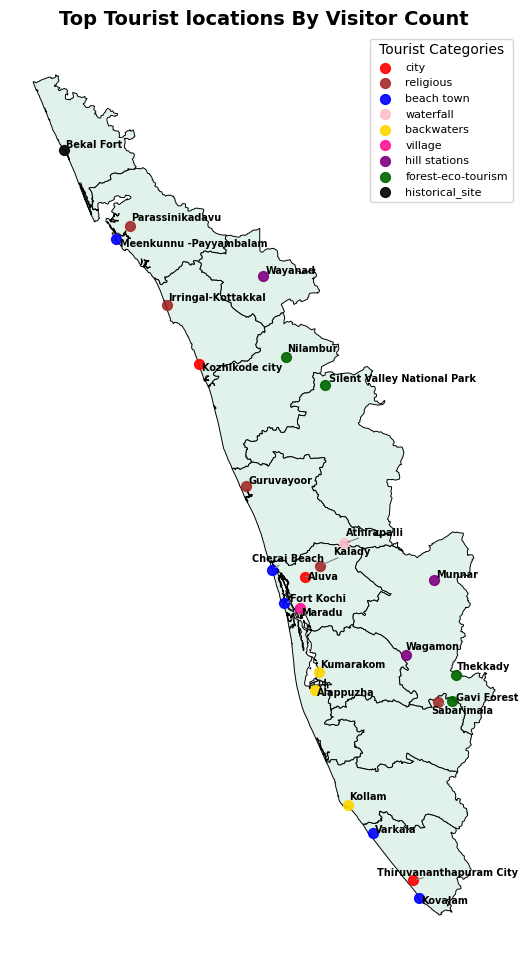

In [55]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# -------- Load Kerala district boundaries --------
districts = gpd.read_file(r"C:\Users\91798\Downloads\Kerala Tourism\gadm41_IND_2.kml", driver="KML")

# Keep only Kerala’s 14 districts
kerala_districts = districts[districts["Name"].isin([
    "IND.17.1_1", "IND.17.2_1", "IND.17.3_1", "IND.17.4_1",
    "IND.17.5_1", "IND.17.6_1", "IND.17.7_1", "IND.17.8_1",
    "IND.17.9_1", "IND.17.10_1", "IND.17.11_1", "IND.17.12_1",
    "IND.17.13_1", "IND.17.14_1"
])]

# Mapping: GADM code → District name
name_mapping = {
    "IND.17.12_1": "THIRUVANANTHAPURAM",
    "IND.17.6_1": "KOLLAM",
    "IND.17.11_1": "PATHANAMTHITTA",
    "IND.17.1_1": "ALAPPUZHA",
    "IND.17.7_1": "KOTTAYAM",
    "IND.17.3_1": "IDUKKI",
    "IND.17.2_1": "ERNAKULAM",
    "IND.17.13_1": "THRISSUR",
    "IND.17.10_1": "PALAKKAD",
    "IND.17.9_1": "MALAPPURAM",
    "IND.17.8_1": "KOZHIKODE",
    "IND.17.14_1": "WAYANAD",
    "IND.17.4_1": "KANNUR",
    "IND.17.5_1": "KASARAGOD"
}
kerala_districts["District"] = kerala_districts["Name"].map(name_mapping)

# -------- Load Tourist Data --------
tourist_df = pd.read_csv("Top Category of Tourist Locations.csv")

# Convert to GeoDataFrame
tourist_gdf = gpd.GeoDataFrame(
    tourist_df,
    geometry=gpd.points_from_xy(tourist_df["Longitude"], tourist_df["Latitude"]),
    crs="EPSG:4326"
)


# -------- Plot Map --------
fig, ax = plt.subplots(figsize=(10, 12))

# Plot Kerala district boundaries
kerala_districts.plot(ax=ax, edgecolor="black", facecolor="#E0F2E9", linewidth=0.7)
# -------- Normalize categories --------
def norm_cat(s):
    s = str(s).strip().lower()
    if s in ["backwater", "backwaters"]:
        return "backwaters"
    if s in ["hill station", "hill stations"]:
        return "hill stations"
    if s in ["waterfall", "waterfalls"]:
        return "waterfall"
    if s in ["historical site", "historical_sites", "historical"]:
        return "historical_site"
    return s
tourist_gdf["_cat"] = tourist_gdf["Category"].map(norm_cat)

# -------- Category color map --------
style_map = {
    "city":          "#FF0000",   # red
    "religious":     "#A52A2A",   # brown
    "beach town":    "#0000FF",   # blue
    "waterfall":     "#FFC0CB",   # pink
    "backwaters":    "#FFD700",   # yellow
    "village":       "#FF1493",   # deep pink
    "hill stations": "#800080",   # purple
    "forest-eco-tourism": "#006400", # deep dark green
    "historical_site": "#000000",   # black
}

# Collect texts for adjustText
texts = []

# Plot Tourist Locations + Labels
for cat, color in style_map.items():
    subset = tourist_gdf[tourist_gdf["_cat"] == cat]
    subset.plot(ax=ax, markersize=50, color=color, label=cat, alpha=0.9)

    for idx, row in subset.iterrows():
        texts.append(
            ax.text(
                row.geometry.x, row.geometry.y, row["Location"],
                fontsize=7, fontweight="bold", color="black"
            )
        )

# Adjust labels to avoid overlap + draw arrows
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle="->", color="gray", lw=0.8),
    ax=ax
)

# Legend
ax.legend(title="Tourist Categories", loc="upper right", fontsize=8)

ax.set_title("Top Tourist locations By Visitor Count", fontsize=14, fontweight="bold")
ax.axis("off")

plt.show()
